## Part 1: Text Preprocessing and Exploration

Let's import the required libraries and load our dataset:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# For text preprocessing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# For dataset loading
from sklearn.datasets import fetch_20newsgroups

# Set random seed for reproducibility
np.random.seed(42)

# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'text': newsgroups.data,
    'category': [newsgroups.target_names[target] for target in newsgroups.target]
})

# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

[nltk_data] Downloading package punkt to /Users/hank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hank/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hank/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /Users/hank/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/hank/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Dataset shape: (2236, 2)

Category distribution:
category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64

Sample document:
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: Dumbest Driver Action
Organization: Corporation for Open Systems
Distribution: usa 
Lines: 41

In <C5Dq2n.5uB@news.cso.uiuc.edu> mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blunier) writes:

>jimf@centerline.com (Jim Frost) writes:

>>I wish I had the figures with me to back me up, but I recall
>>statistics showing that women tended to have more accidents than men
>>but the damage was generally quite minor.  Men had fewer but far more
>>expensive acciden


### Step 1: Basic Data Exploration
Let's examine the length characteristics of our documents:

In [7]:
print(df.head())
df.info()
df.describe()

                                                text            category
0  From: nfotis@ntua.gr (Nick C. Fotis)\nSubject:...       comp.graphics
1  From: cdm@pmafire.inel.gov (Dale Cook)\nSubjec...  talk.politics.misc
2  From: rick@trystro.uucp (Richard Nickle)\nSubj...           sci.space
3  From: marshatt@feserve.cc.purdue.edu (Zauberer...           rec.autos
4  From: Clinton-HQ@Campaign92.Org (Clinton/Gore ...  talk.politics.misc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2236 non-null   object
 1   category  2236 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


,text,category
count,2236,2236
unique,2236,4
top,From: nfotis@ntua.gr (Nick C. Fotis)\nSubject:...,rec.autos
freq,1,594


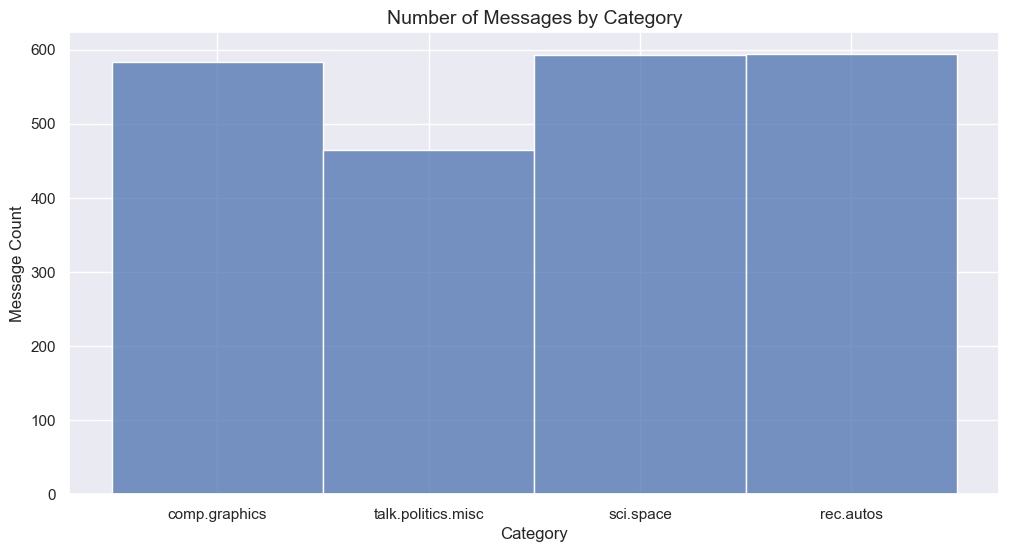

In [30]:
# bar plot showing class distribution of category
plt.figure(figsize=(12, 6))
sns.histplot(df['category'])
plt.title('Number of Messages by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Message Count', fontsize=12)
plt.show()

Text Length Statistics by Category:
                    count         mean          std    min     25%     50%  \
category                                                                     
comp.graphics       584.0  1557.083904  4684.767252  125.0   572.5   883.0   
rec.autos           594.0  1444.897306  1594.224770  131.0   754.0  1133.5   
sci.space           593.0  2016.170320  3213.495426  166.0   796.0  1195.0   
talk.politics.misc  465.0  2852.027957  5105.607017  160.0  1079.0  1644.0   

                       75%      max  
category                             
comp.graphics       1341.5  60713.0  
rec.autos           1750.5  27760.0  
sci.space           1912.0  40353.0  
talk.politics.misc  2680.0  49447.0  


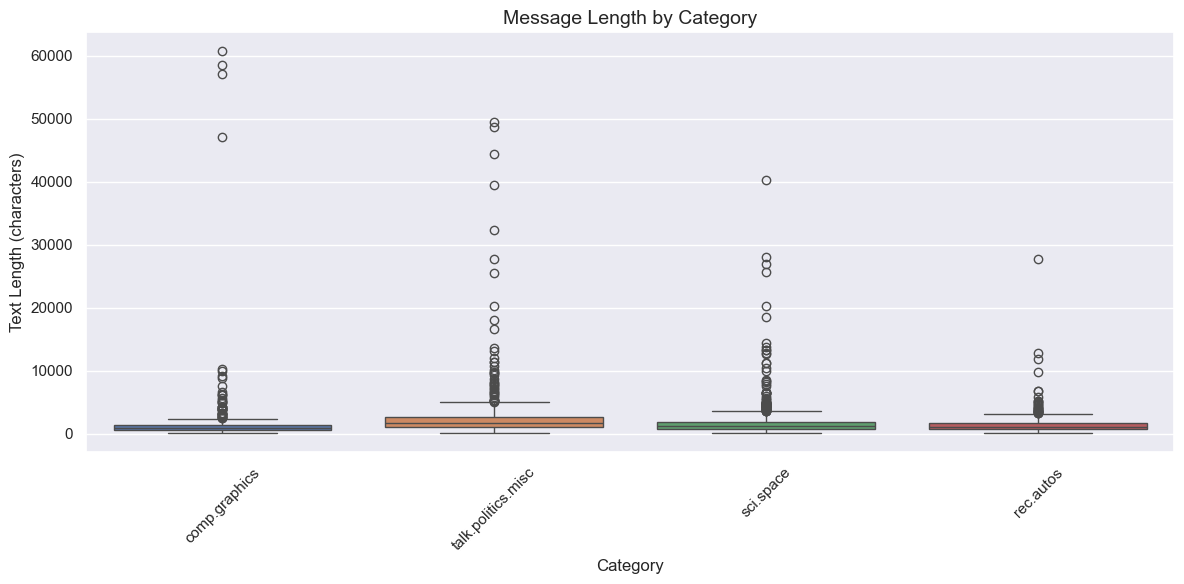

In [14]:
# Look at text length by category
df['text_length'] = [len(text) for text in df['text']]
text_length_stats = df.groupby('category')['text_length'].describe()

# Display the statistics
print("Text Length Statistics by Category:")
print(text_length_stats)

# Visualize text length by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='text_length', data=df, hue='category', legend=False)
plt.title('Message Length by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 2: Text Cleaning and Preprocessing Function
Let's create a comprehensive text preprocessing function that incorporates all the techniques we've learned:

In [17]:
# Replace None with your code
def clean_text(text):
    """
    Clean and preprocess text by:
    - Converting to lowercase
    - Removing punctuation and special characters
    - Removing numbers
    
    Parameters:
    -----------
    text : str
        The text to clean
        
    Returns:
    --------
    str
        Cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

# Helper function for lemmatization with POS tagging
def get_wordnet_pos(treebank_tag):
    """
    Convert NLTK POS tags to WordNet POS tags
    """
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

def tokenize_and_lemmatize(text):
    """
    Tokenize text, remove stopwords, and lemmatize tokens.
    
    Parameters:
    -----------
    text : str
        The text to process
        
    Returns:
    --------
    list
        List of processed tokens
    """
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Tag tokens with parts of speech
    tokens_tagged = nltk.pos_tag(tokens)
    
    # Convert to WordNet POS tags
    pos_tokens = [(word[0], get_wordnet_pos(word[1])) for word in tokens_tagged]
    
    # # Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(token[0], token[1]) for token in pos_tokens if token[0] not in stop_words and len(token[0]) > 1]
    
    return processed_tokens

def preprocess_text(text):
    """
    Complete preprocessing pipeline: clean, tokenize, lemmatize, and rejoin.
    
    Parameters:
    -----------
    text : str
        The raw text to process
        
    Returns:
    --------
    str
        Fully processed text
    """
      # Apply cleaning
    cleaned_text = clean_text(text)
    
    # Apply tokenization and lemmatization
    processed_tokens = tokenize_and_lemmatize(cleaned_text)
    
    # Join tokens back into single text string
    # processed_text = ' '.join(processed_tokens)
    
    return processed_tokens

### Step 3: Apply Preprocessing and Analyze Results
Now let's apply our preprocessing function to the dataset and examine the results:

In [18]:
# Test our preprocessing functions on a single sample message
sample_text = df['text'].iloc[0]
print(f"Original text:\n{sample_text}")

cleaned_text = clean_text(sample_text)
print(f"\nCleaned text:\n{cleaned_text}")

tokens = tokenize_and_lemmatize(cleaned_text)
print(f"\nTokenized and lemmatized text:\n{tokens}")

processed_text = preprocess_text(sample_text)
print(f"\nFully preprocessed text:\n{processed_text}")

Original text:
From: nfotis@ntua.gr (Nick C. Fotis)
Subject: Re: more on radiosity
Organization: National Technical University of Athens
Lines: 34

amann@iam.unibe.ch (Stephan Amann) writes:

>In article 66319@yuma.ACNS.ColoState.EDU, xz775327@longs.LANCE.ColoState.Edu (Xia Zhao) writes:
>>
>>
>>In article <1993Apr19.131239.11670@aragorn.unibe.ch>, you write:
>>|>
>>|>
>>|> Let's be serious... I'm working on a radiosity package, written in C++.
>>|> I would like to make it public domain.  I'll announce it in c.g. the minute
>>|> I finished it.
>>|>
>>|> That were the good news. The bad news: It'll take another 2 months (at least)
>>|> to finish it.

Please note that there are some radiosity packages in my Resource Listing
(under the Subject 3: FTP list)

Greetings,
Nick.
--
Nick (Nikolaos) Fotis         National Technical Univ. of Athens, Greece
HOME: 16 Esperidon St.,       InterNet : nfotis@theseas.ntua.gr
      Halandri, GR - 152 32   UUCP:    mcsun!ariadne!theseas!nfotis
      Athe

In [19]:
df['processed_text'] = [preprocess_text(text) for text in df['text']]
for i in range(5):
    print(df['processed_text'][i])

['nfotisntuagr', 'nick', 'fotis', 'subject', 'radiosity', 'organization', 'national', 'technical', 'university', 'athens', 'line', '34', 'amanniamunibech', 'stephan', 'amann', 'write', 'article', '66319yumaacnscolostateedu', 'xz775327longslancecolostateedu', 'xia', 'zhao', 'write', 'article', '1993apr1913123911670aragornunibech', 'write', 'let', 'serious', 'im', 'work', 'radiosity', 'package', 'write', 'would', 'like', 'make', 'public', 'domain', 'ill', 'announce', 'cg', 'minute', 'finish', 'good', 'news', 'bad', 'news', 'itll', 'take', 'another', 'month', 'least', 'finish', 'please', 'note', 'radiosity', 'package', 'resource', 'list', 'subject', 'ftp', 'list', 'greeting', 'nick', 'nick', 'nikolaos', 'fotis', 'national', 'technical', 'univ', 'athens', 'greece', 'home', '16', 'esperidon', 'st', 'internet', 'nfotistheseasntuagr', 'halandri', 'gr', '152', '32', 'uucp', 'mcsunariadnetheseasnfotis', 'athens', 'greece', 'fax', '30', '77', '84', '578', 'usenet', 'editor', 'compgraphics', 'res

### Step 4: Token Frequency Analysis
Let's analyze the most common words in each category after preprocessing:

In [22]:
all_tokens = []
for tokens in df['processed_text']:
    all_tokens.extend(tokens)
unique_token_count_post = len(set(all_tokens))
print(unique_token_count_post)

35791


<Axes: title={'center': 'Top 20 Words in Reviews'}, xlabel='Samples', ylabel='Counts'>

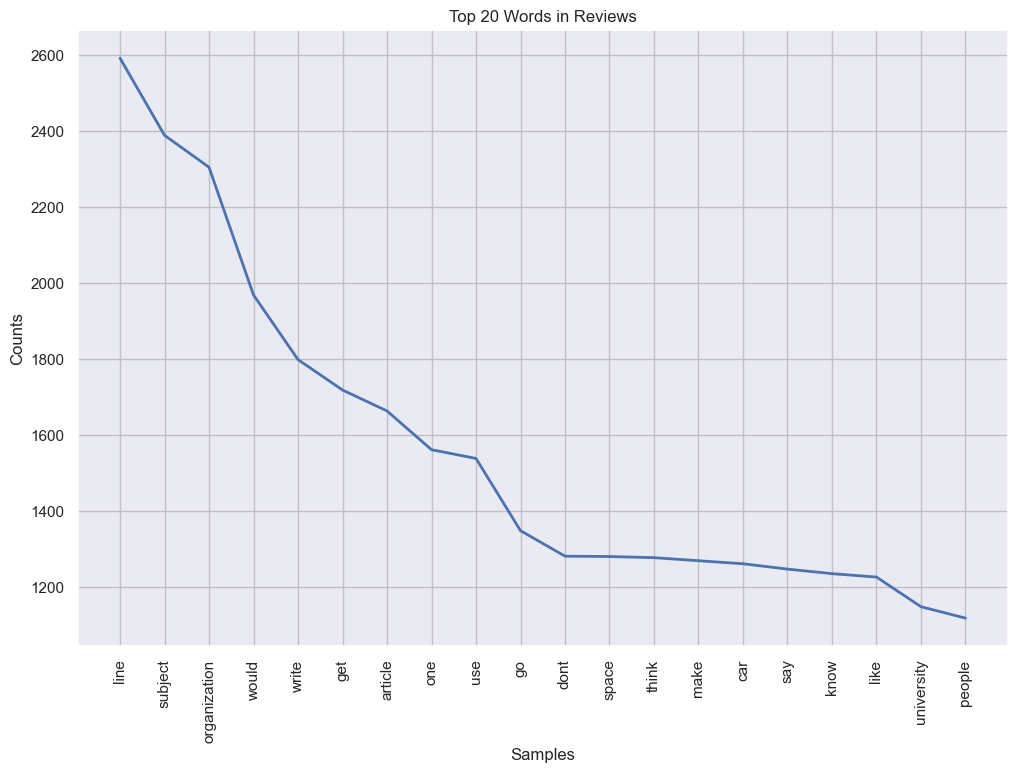

In [ ]:
# Calculate token frequencies across all messages
token_freq = nltk.probability.FreqDist(all_tokens)
plt.figure(figsize=(12, 8))
token_freq.plot(20, title="Top 20 Words in Reviews")

['comp.graphics' 'talk.politics.misc' 'sci.space' 'rec.autos']


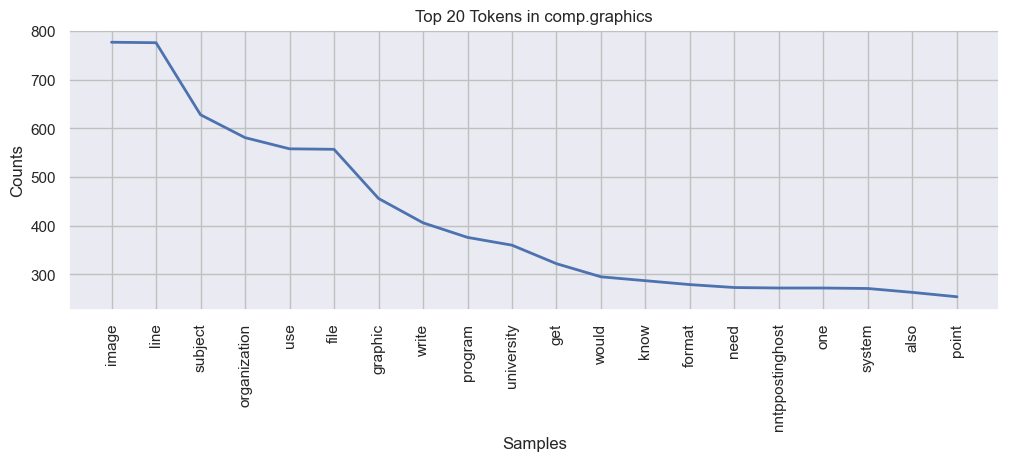

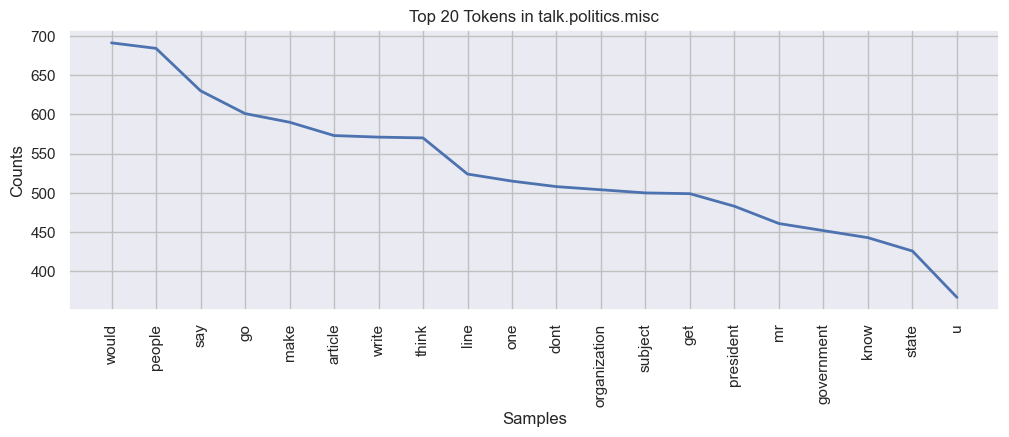

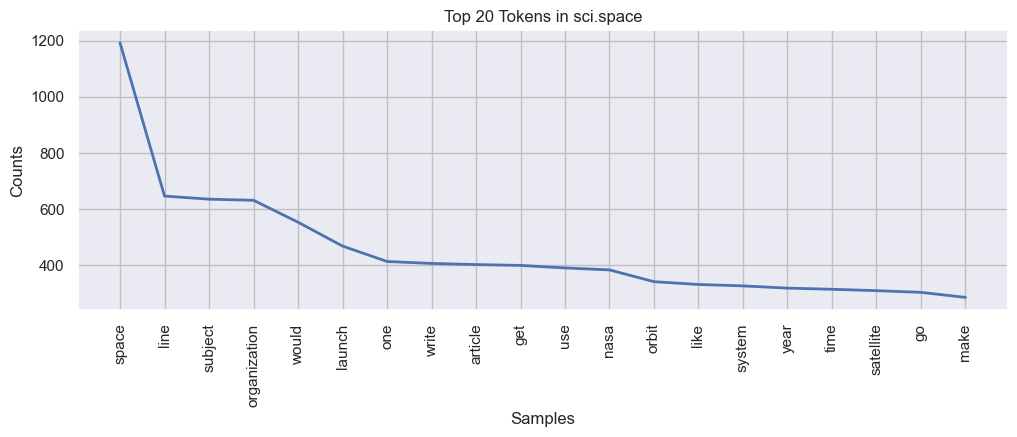

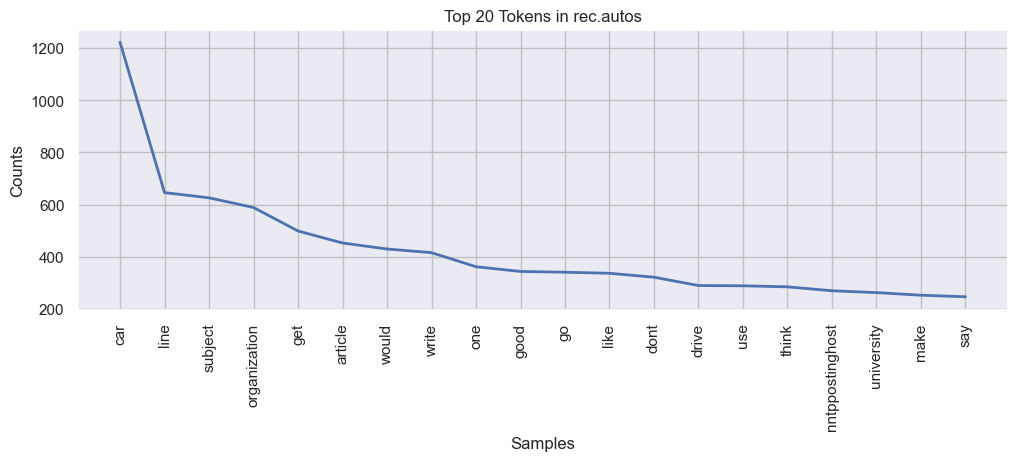

In [ ]:
# split messages by categories
tokens_by_category ={}
categories = df['category'].unique()

for category in categories:
    messages_by_category = df[df['category'] == category]['processed_text']
    all_tokens_by_cat = []
    for tokens in messages_by_category:
        all_tokens_by_cat.extend(tokens)
    
    tokens_by_category[category] = all_tokens_by_cat

# plot frequencies by category
for key, value in tokens_by_category.items():
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    nltk.probability.FreqDist(value).plot(20, title=f"Top 20 Tokens in {key}")

### Step 5: N-gram Analysis
Let's go beyond single words and look at common bigrams and trigrams:

In [36]:
# Function to generate ngrams
def generate_ngrams(tokens, n):
    """
    Generate n-grams from a list of tokens
    
    Parameters:
    tokens (list): List of tokens
    n (int): Size of n-grams to generate
    
    Returns:
    list: List of n-grams as tuples
    """
    return list(ngrams(tokens, n))

In [37]:
# generate bigrams and trigrams
df['bigrams'] = df['processed_text'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['processed_text'].apply(lambda x: generate_ngrams(x, 3))

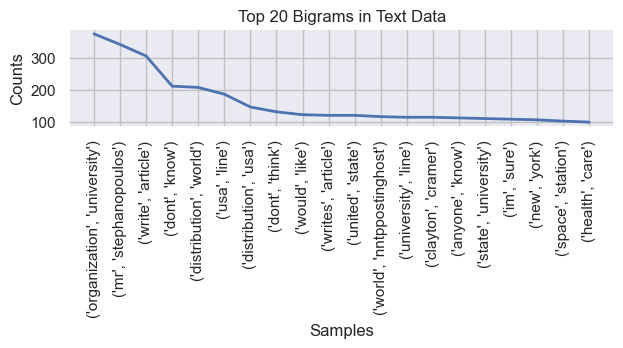

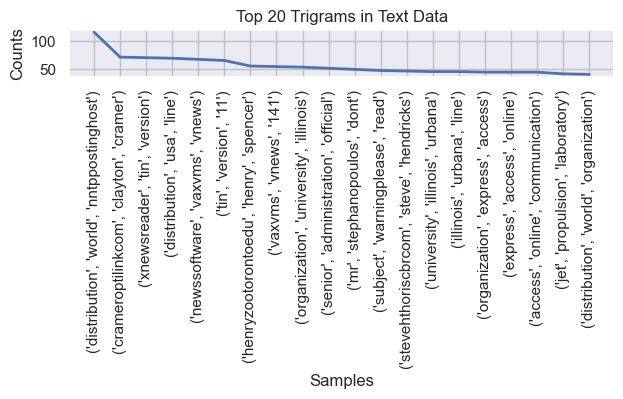

In [62]:
# Plot frequencies of bigrams and trigrams accross all categories

# Bigrams
all_bigrams = []
for bigrams in df['bigrams']:
    all_bigrams.extend(bigrams)

plt.subplot(2, 1, 2)
nltk.probability.FreqDist(all_bigrams).plot(20, title="Top 20 Bigrams in Text Data")
plt.tight_layout()
plt.show()

#Trigrams
all_trigrams = []
for trigrams in df['trigrams']:
    all_trigrams.extend(trigrams)

plt.subplot(2, 1, 2)
nltk.probability.FreqDist(all_trigrams).plot(20, title="Top 20 Trigrams in Text Data")
plt.tight_layout()
plt.show()

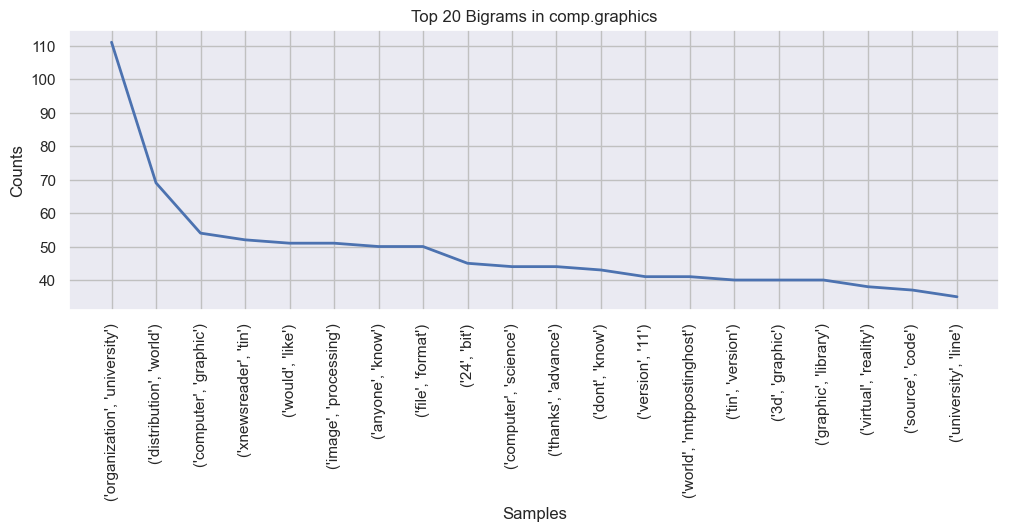

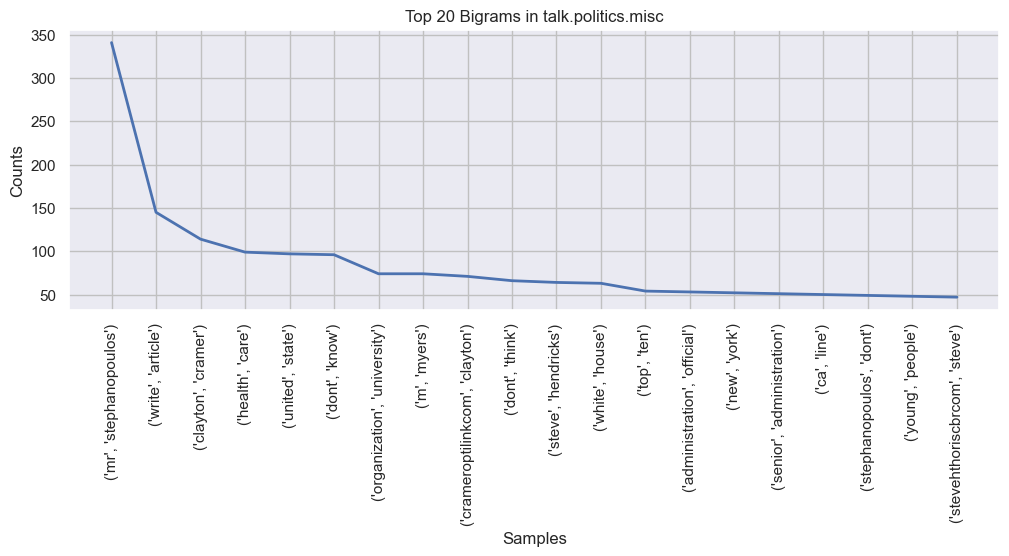

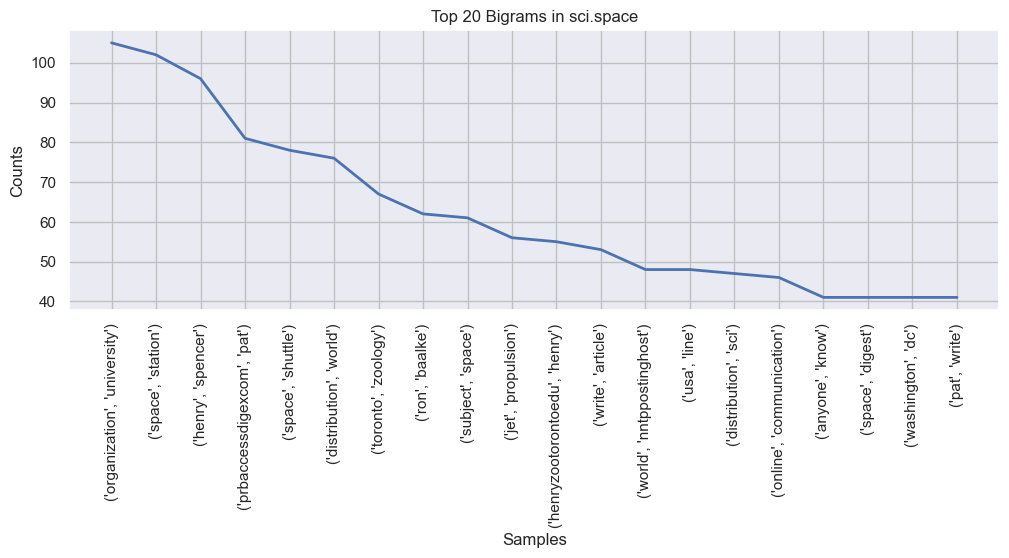

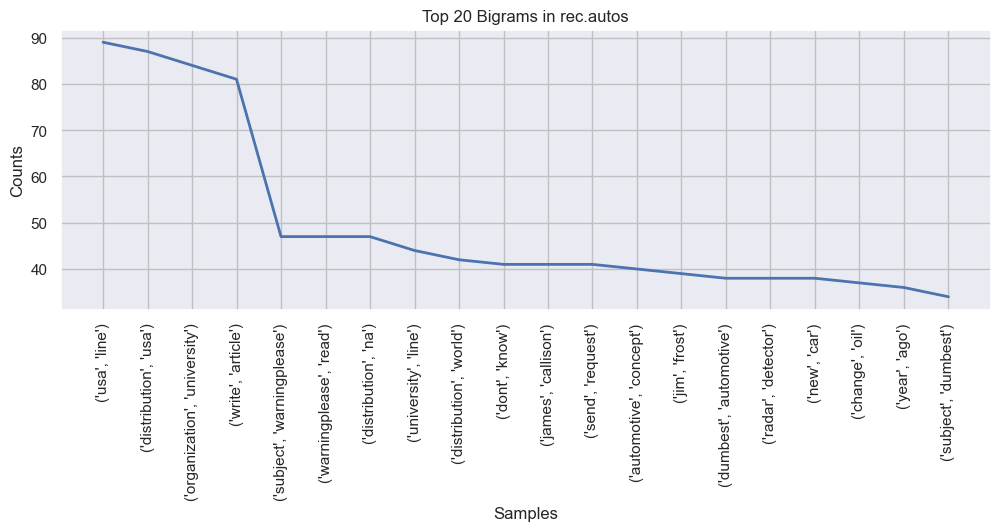

In [70]:
# Plot bigram and trigram frequencies by category
# split messages by categories
bigrams_by_category ={}
categories = df['category'].unique()

for category in categories:
    bigrams_by_cat = df[df['category'] == category]['bigrams']
    all_bigrams_by_cat = []
    for bigrams in bigrams_by_cat:
        all_bigrams_by_cat.extend(bigrams)
    
    bigrams_by_category[category] = all_bigrams_by_cat


# plot frequencies by category
for key, value in bigrams_by_category.items():
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    nltk.probability.FreqDist(value).plot(20, title=f"Top 20 Bigrams in {key}")

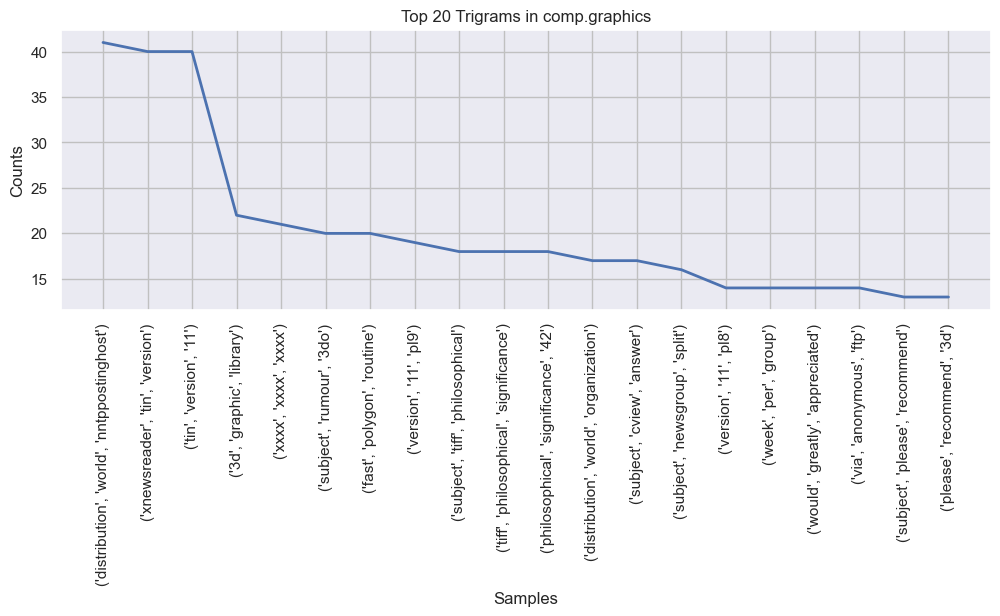

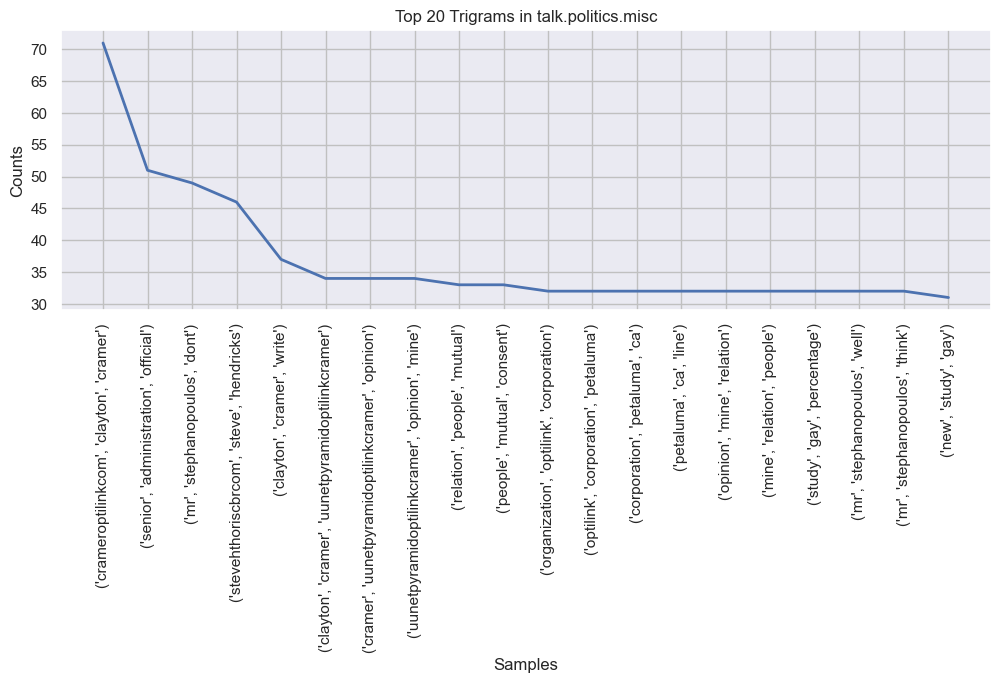

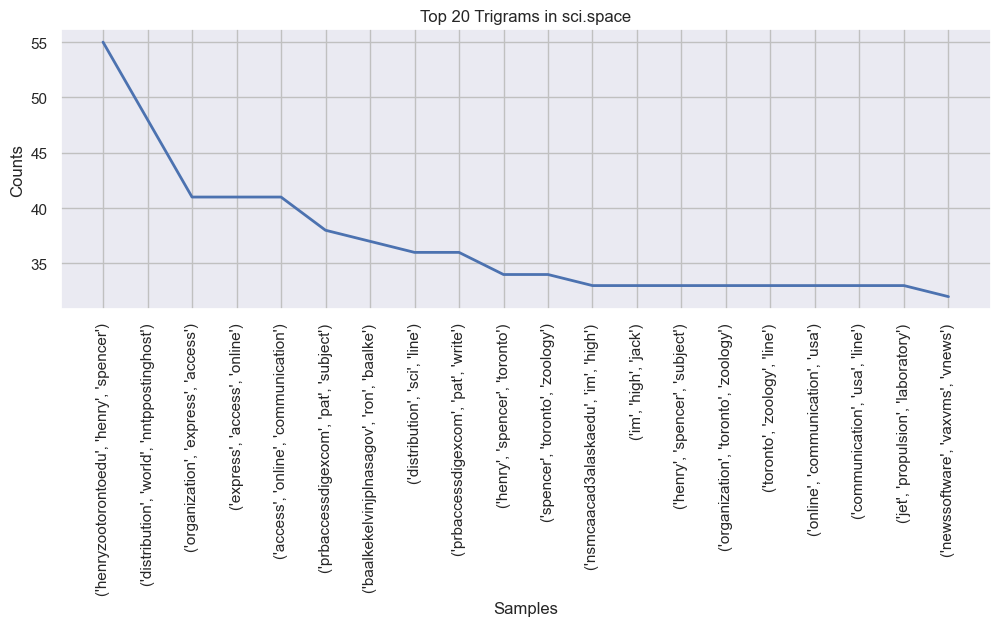

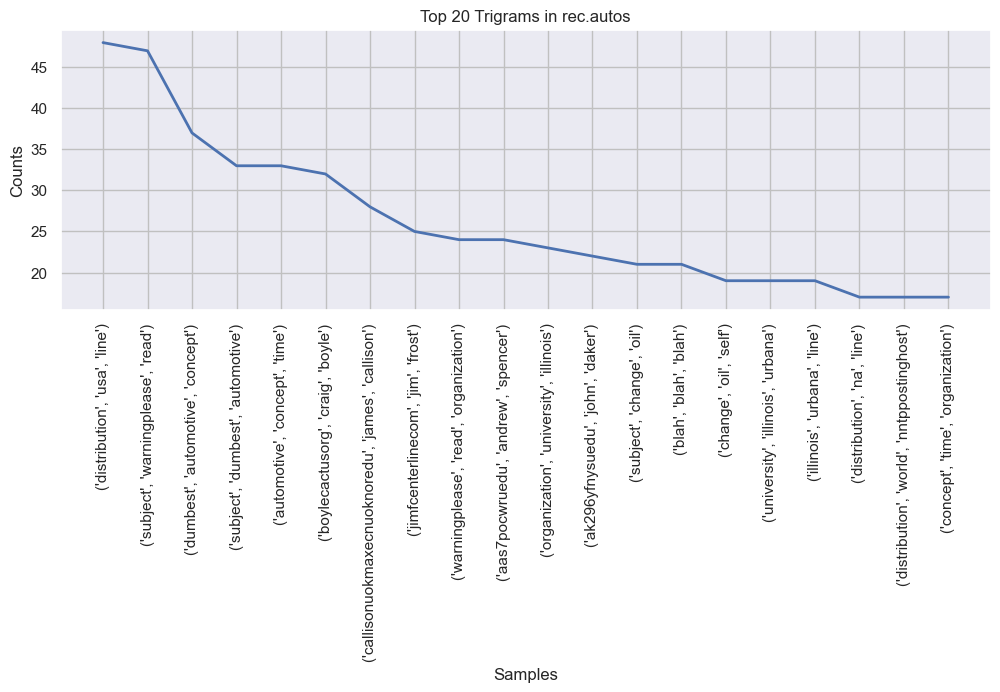

In [68]:
# Plot trigram and trigram frequencies by category
# split messages by categories
trigrams_by_category ={}
categories = df['category'].unique()

for category in categories:
    trigrams_by_cat = df[df['category'] == category]['trigrams']
    all_trigrams_by_cat = []
    for trigrams in trigrams_by_cat:
        all_trigrams_by_cat.extend(trigrams)
    
    trigrams_by_category[category] = all_trigrams_by_cat


# plot frequencies by category
for key, value in trigrams_by_category.items():
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    nltk.probability.FreqDist(value).plot(20, title=f"Top 20 Trigrams in {key}")

## Part 2: Time Series Analysis and Modeling

### Step 1: Data Loading and Initial Exploration
First, let's load the S&P 500 historical data and perform initial exploration.

In [2]:
# ! pip install yfinance

[*********************100%***********************]  1 of 1 completed


S&P 500 Dataset:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2013-01-02  1462.420044  1462.430054  1426.189941  1426.189941  4202600000
2013-01-03  1459.369995  1465.469971  1455.530029  1462.420044  3829730000
2013-01-04  1466.469971  1467.939941  1458.989990  1459.369995  3424290000
2013-01-07  1461.890015  1466.469971  1456.619995  1466.469971  3304970000
2013-01-08  1457.150024  1461.890015  1451.640015  1461.890015  3601600000

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   2518 non-null   float64
 1   (High, ^GSPC)    2518 non-null   float64
 2   (Low, ^GSPC)     2518 non-null   float64
 3   (O

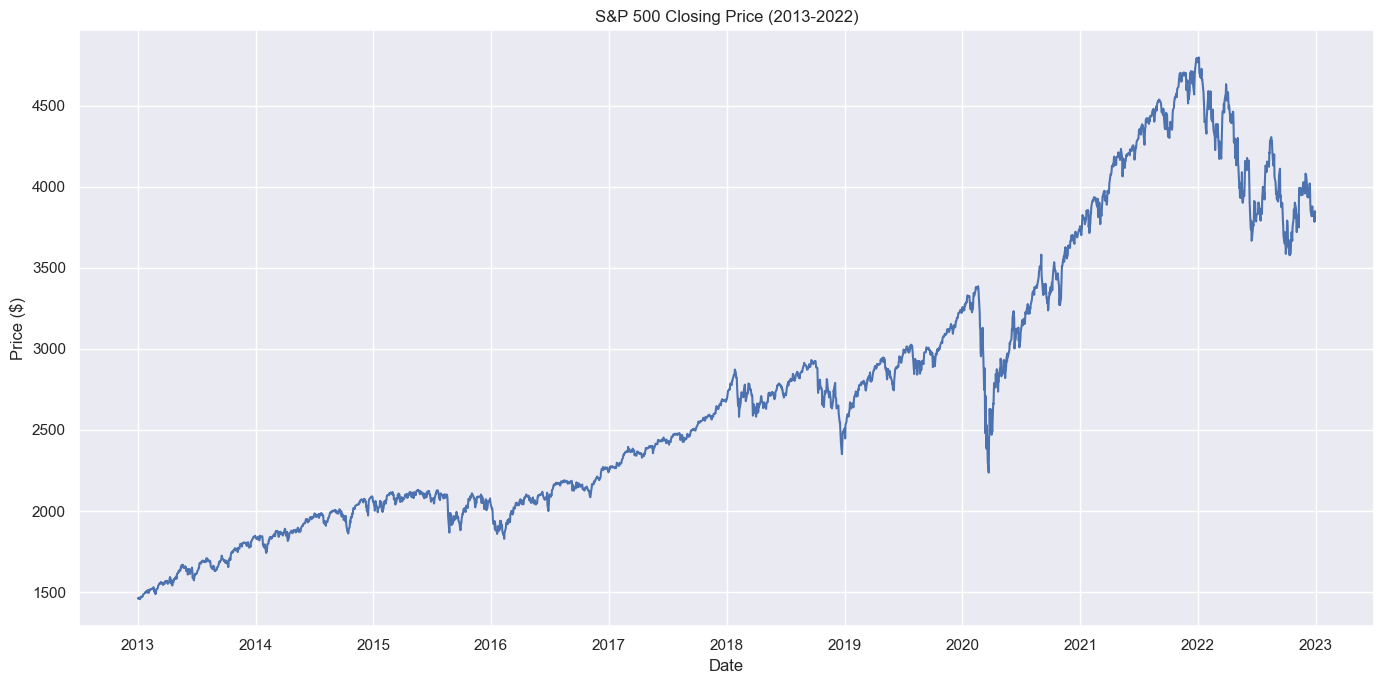


Selected time series shape: (2518, 1)


In [71]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_theme()

# Download S&P 500 data for the last 10 years
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')

# Display the first few rows of the dataset
print("S&P 500 Dataset:")
print(sp500.head())

# Display basic information about the dataset
print("\nDataset information:")
print(sp500.info())

# Calculate basic summary statistics
print("\nSummary Statistics:")
print(sp500['Close'].describe())

# Check for missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select the closing price as our primary time series for analysis
ts_data = sp500['Close']
print("\nSelected time series shape:", ts_data.shape)

### Step 2: Time Series Characteristics and Visualization
Let's analyze the characteristics of the time series through various visualizations.

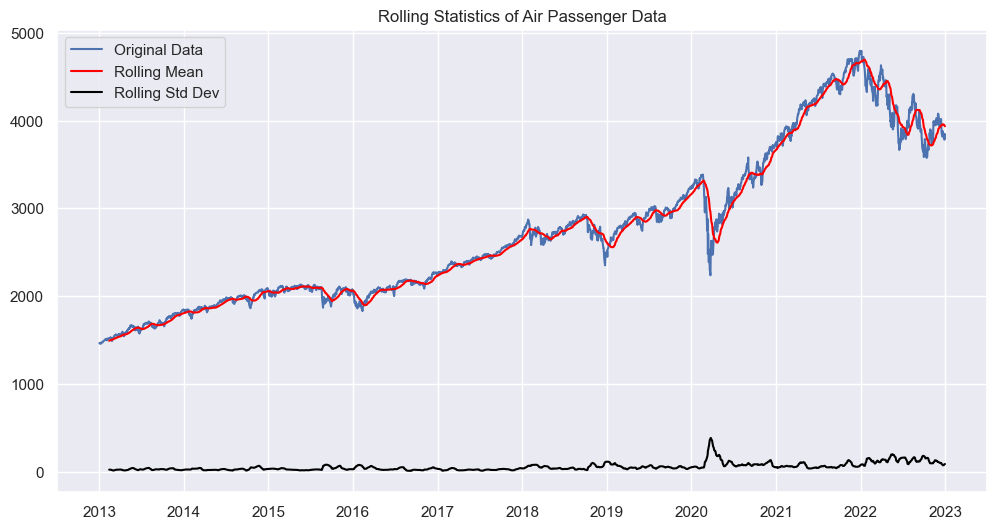

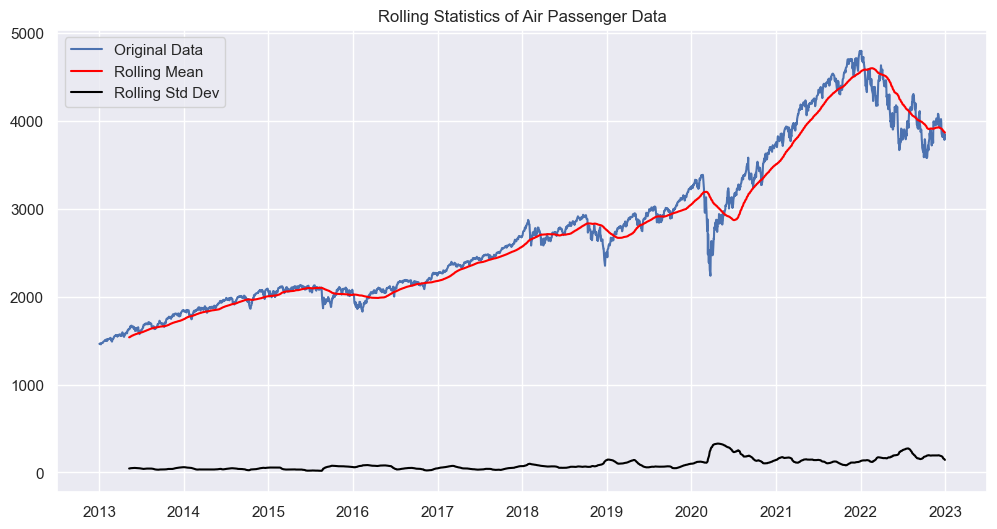

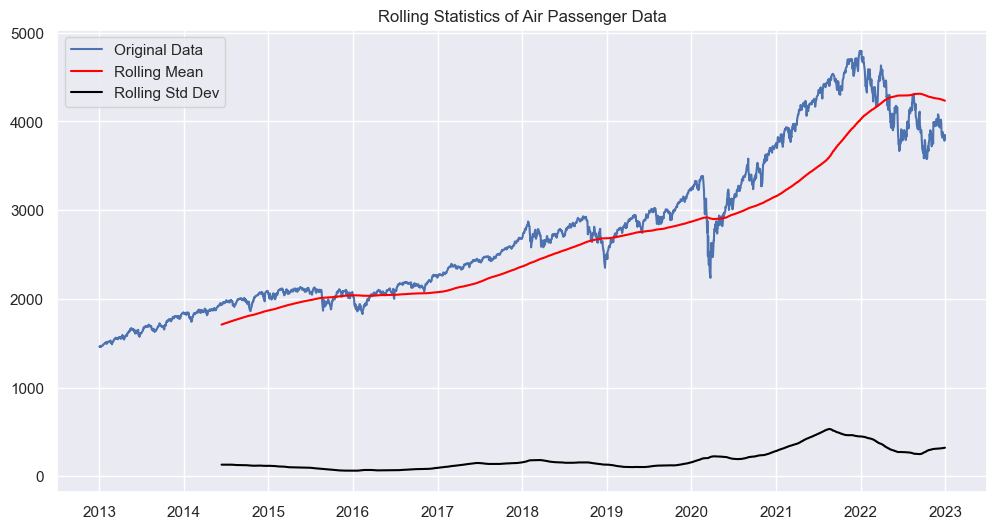

In [106]:
windows = [30, 90, 365] # Monthly, Quarterly, Yearly

for window in windows:
# Rolling mean and standard deviation
    rolling_mean = sp500['Close'].rolling(window=window).mean()
    rolling_std = sp500['Close'].rolling(window=window).std()

    #plot rolling mean and standard deviation
    plt.figure(figsize=(12, 6))
    plt.plot(sp500['Close'], label='Original Data')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='black')
    plt.legend()
    plt.title("Rolling Statistics of Air Passenger Data")
    plt.show()

### Step 3: Stationarity Testing and Transformation
Now, let's test for stationarity using the Dickey-Fuller test and apply transformations to make the data stationary.

In [ ]:
result = adfuller(sp500['Close'])

# ADF
print(f"Test Statistic: {np.round(result[0], 4)}")
print(f"p-value: {np.round(result[1], 4)}")
print(f"Critical Values: {result[4]}")

Test Statistic: -1.0312
p-value: 0.7417
Critical Values: {'1%': -3.4329610922579095, '5%': -2.8626935681060375, '10%': -2.567384088736619}


The data does not seem to be stationary. Let's apply some transforms to see if we can get a stationary series.

Test Statistic: -15.8757
p-value: 0.0
Critical Values: {'1%': -3.4329610922579095, '5%': -2.8626935681060375, '10%': -2.567384088736619}


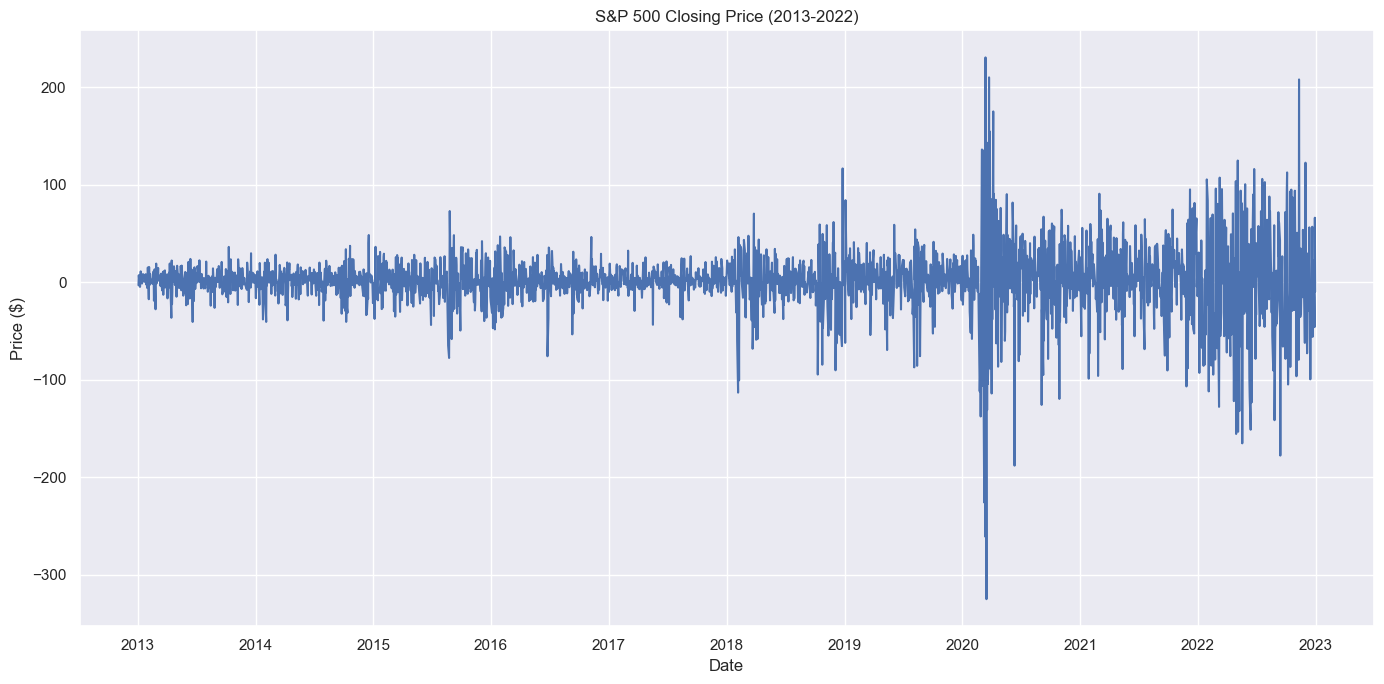

In [97]:
# Differencing the time series data
# Differencing with MultiIndex handling
sp500['Diff_Close'] = sp500[('Close', '^GSPC')].diff()

diff_result = adfuller(sp500['Diff_Close'].dropna())
print(f"Test Statistic: {np.round(diff_result[0], 4)}")
print(f"p-value: {np.round(diff_result[1], 4)}")
print(f"Critical Values: {diff_result[4]}")

# Plot the differenced closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Diff_Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()

The differenced time series does seem to be stationary - both visually and by the test statistic result.

### Step 4: Time Series Decomposition
Let's decompose our time series into trend, seasonal, and residual components.

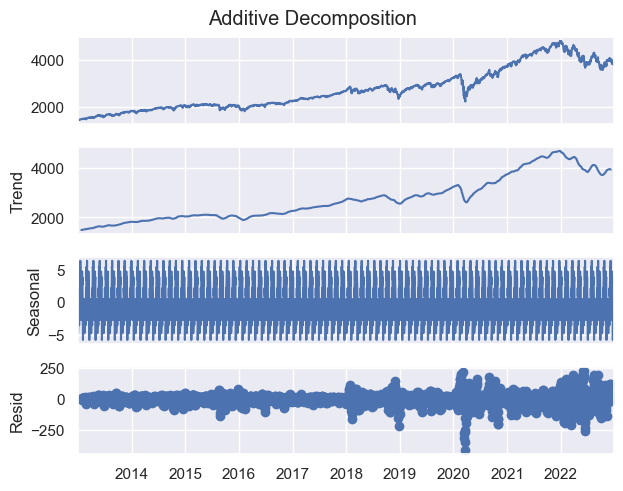

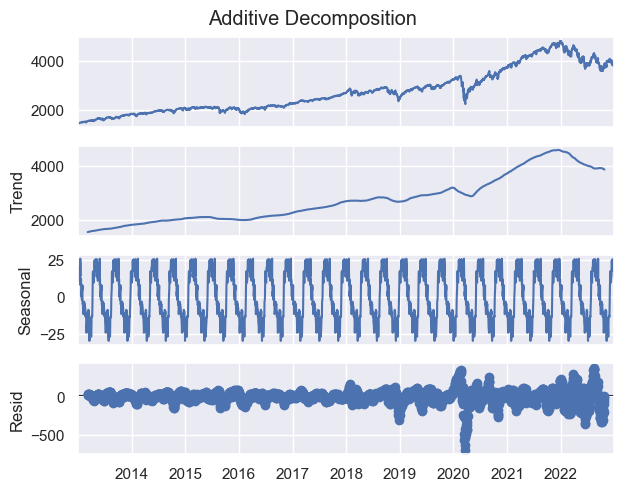

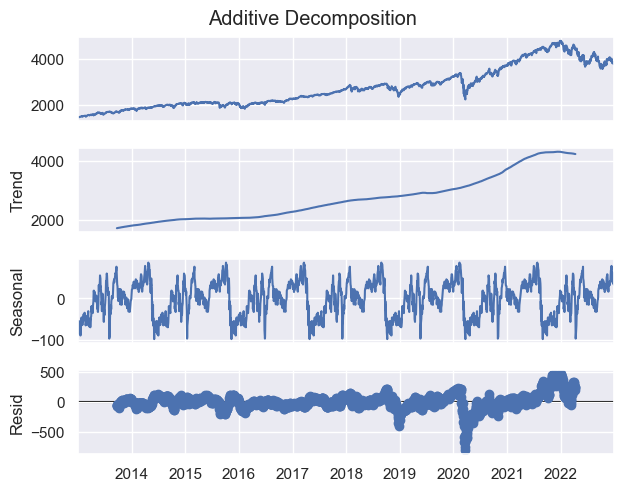

In [ ]:
# Decompose the time series into trend, seasonal, and residual components with differing periods
periods = [30, 90, 365] # Monthly, Quarterly, Yearly
for period in periods:
    decomposition_add = seasonal_decompose(sp500['Close'], model='additive', period=period)

    # Perform multiplicative decomposition (if appropriate for your data)
    # decomposition_mul = seasonal_decompose(series, model='multiplicative', period=12)

    # Plot the decomposed components
    decomposition_add.plot()
    plt.suptitle('Additive Decomposition', y=1.02) # Adjust title position
    plt.show()

    # Access individual components
    trend = decomposition_add.trend
    seasonal = decomposition_add.seasonal
    residual = decomposition_add.resid

### Step 5: Autocorrelation Analysis
Now, let's analyze the autocorrelation structure of our stationary series.

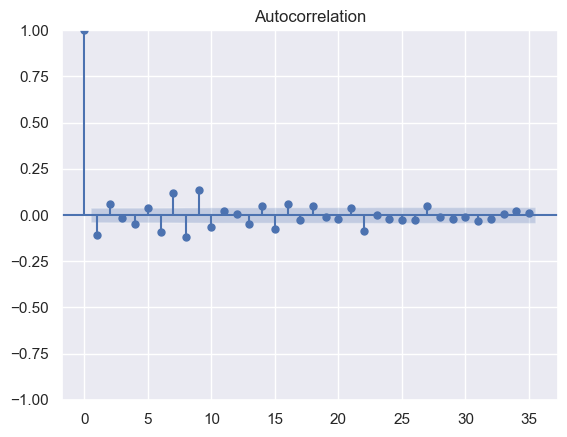

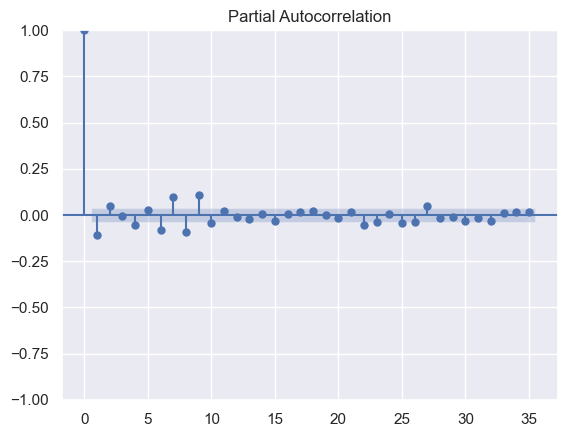

In [100]:
plot_acf(sp500['Diff_Close'].dropna())
plt.show()
plot_pacf(sp500['Diff_Close'].dropna())
plt.show()

### Step 6: Time Series Modeling
Finally, let's build and evaluate time series models based on our analysis.

In [322]:
# Define and fit ARIMA model
from tabnanny import verbose

#automated search of orders to select best model by lowest bic
p_values = [0, 1, 2, 9, 11, 13]
d_values = [1, 2]
q_values = [0, 1, 2, 9, 11, 13]

best_bic = float('inf')
best_order = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(sp500['Close'].dropna(), order=(p, d, q))
                model_fit = model.fit()
                if model_fit.bic < best_bic:
                    best_bic = model_fit.bic
                    best_order = (p, d, q)
            except Exception as e:
                continue

print(f"Best order: {best_order} with BIC: {best_bic}")

# model = ARIMA(sp500['Close'].dropna(), order=(11,1,11))
# model_fit = model.fit()

# # Print model summary
# aic = model_fit.aic
# bic = model_fit.bic

# np.round(aic, 1), np.round(bic, 1)

Best order: (2, 1, 2) with BIC: 24721.43123144696


In [323]:
best_model = ARIMA(sp500['Close'].dropna(), order=best_order)
best_model_fit = best_model.fit()

In [328]:
# Instead of dropping the first value, align the predictions with true_values:
sp500_all = yf.download('^GSPC', start='2013-01-01', end='2023-12-31')
true_values = sp500_all['Close']

[*********************100%***********************]  1 of 1 completed


In [330]:
# Forecast next 12 months
import datetime
ts_predictions = model_fit.predict(
    start = 1, 
    end = len(sp500_all))
ts_predictions.index = sp500_all.index

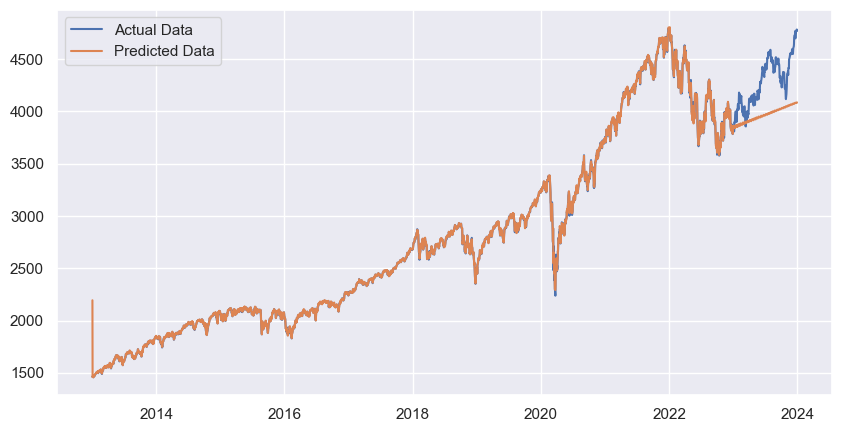

In [331]:
# Plot predictions

#plot predictions vs actual data matching the index
plt.figure(figsize=(10, 5))
plt.plot(true_values, label='Actual Data')
plt.plot(ts_predictions, label='Predicted Data')
plt.legend()
plt.show()

## Part 3: Neural Networks Implementation and Optimization

### Step 1: Load libraries and prepare the datasets

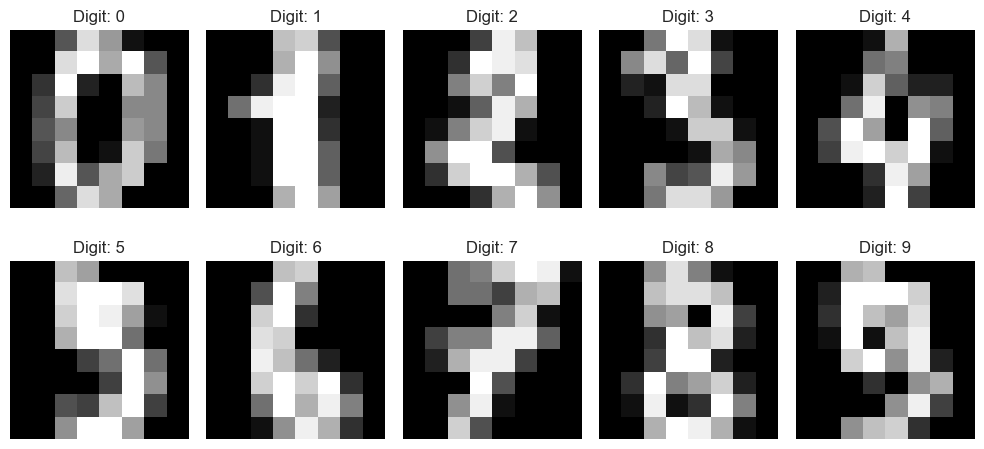

Digits dataset: 1797 samples, 64 features


In [272]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

### Step 2: Preprocess data for neural networks

In [ ]:
# Instead of creating a DataFrame, work directly with numpy arrays
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# Convert to numpy arrays to ensure proper dtype
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize the data (important for neural networks)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Step 3: Build a basic MLP for digits classification using TensorFlow/Keras

In [ ]:
model = keras.Sequential([
    keras.layers.Input((64,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # softmax output activation for multi-class
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # categorical not binary for multi-class
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [282]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=50,               # Number of epochs with no improvement after which to stop
    min_delta=0.001,          # Minimum change to qualify as improvement
    restore_best_weights=True # Restore model weights from the epoch with the best value
)

# Model checkpoint callback to save the best model
checkpoint_filepath = './best_model.keras'
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,      # Only save when there's improvement
    mode='min',               # The direction is 'min' for loss
    verbose=1                 # Show progress
)

checkpoint_filepath2 = './best_model2.keras'
model_checkpoint2 = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    monitor='val_accuracy',
    save_best_only=True,      # Only save when there's improvement
    mode='max',               # The direction is 'min' for loss
    verbose=1
)

# Combine callbacks into a list
callbacks = [
    early_stopping,
    model_checkpoint,
]

callbacks2 = [
    early_stopping,
    model_checkpoint2,
]

In [276]:
# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=100,                # Set a high number, early stopping will halt training if needed
    batch_size=128,
    validation_split=0.2,     # Use 20% of training data for validation
    callbacks=callbacks,      # Pass the callbacks list here
    verbose=1
)

Epoch 1/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - accuracy: 0.1328 - loss: 2.3023
Epoch 1: val_loss improved from None to 2.28448, saving model to ./best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1941 - loss: 2.2941 - val_accuracy: 0.2743 - val_loss: 2.2845
Epoch 2/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3125 - loss: 2.2778
Epoch 2: val_loss improved from 2.28448 to 2.26158, saving model to ./best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3151 - loss: 2.2712 - val_accuracy: 0.2743 - val_loss: 2.2616
Epoch 3/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3281 - loss: 2.2527
Epoch 3: val_loss improved from 2.26158 to 2.23070, saving model to ./best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3255 - loss: 2.2426 - val_accuracy: 0.2569 - val_loss: 2.2307
Epoch 4/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3359 - loss: 2.2183
Epoch 4: val_loss improved from 2.23070 to 2.18799, saving model to

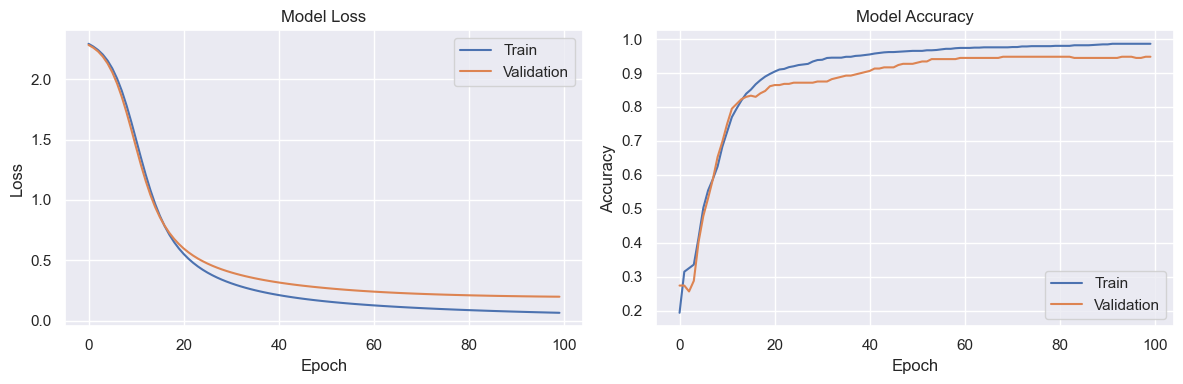

Training stopped at epoch 100


In [277]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

In [278]:
# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

12/12 - 0s - 16ms/step - accuracy: 0.9500 - loss: 0.1541
Test accuracy: 0.9500


### Step 4: Implement the digits classification model in PyTorch

In [301]:
# Convert NumPy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [319]:


# Define MLP architecture
class MLPClassifier(nn.Module):
    def __init__(self, input_size):
        super(MLPClassifier, self).__init__()
        # First layer with BatchNorm
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        # Second layer with ReLU and then Dropout (matching TensorFlow placement)
        self.layer2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3)  # Moved dropout after ReLU to match TensorFlow
        )
        # Output layer
        self.layer3 = nn.Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.softmax(x)
        return x

# Create model
pt_classifier = MLPClassifier(X_train_t.shape[1])

# Use Adam optimizer with default settings to match TensorFlow
# TensorFlow default Adam: lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-7
optimizer = optim.Adam(
    pt_classifier.parameters(),
    lr=0.001,  # Default TensorFlow learning rate
    betas=(0.9, 0.999),  # Default betas
    eps=1e-8  # PyTorch default epsilon

)

In [320]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Create DataLoader for mini-batch training
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Match TF batch size=32

# Training loop with mini-batches (50 epochs to match TensorFlow)
num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0

    # Mini-batch training
    for batch_x, batch_y in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = pt_classifier(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print statistics (similar to TensorFlow verbose=1)
    if epoch % 10 == 0 or epoch == num_epochs-1:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/50], Loss: 2.1760
Epoch [11/50], Loss: 1.4975
Epoch [21/50], Loss: 1.4783
Epoch [31/50], Loss: 1.4704
Epoch [41/50], Loss: 1.4703
Epoch [50/50], Loss: 1.4686


In [321]:
# Evaluate model
pt_classifier.eval()
with torch.no_grad():
    outputs = pt_classifier(X_test_t)
    _ , predictions = torch.max(outputs.data, 1)
    _ , true_values = torch.max(y_test_t, 1)
    ce_loss = criterion(outputs, y_test_t)
    #accuracy
    correct_predictions = (predictions == true_values).sum().item()
    accuracy = 100 * (correct_predictions / len(y_test_t))

print(f'Test Cross Entropy Loss: {ce_loss.item():.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Cross Entropy Loss: 1.4816
Test Accuracy: 98.0556


## Thoughts on Model comparison
-----------------
Performance on the PyTorch model is better on the test set. Structurally the neural networks are identical, but the PyTorch training process incorporated batch normalization and dropout which seems to have meaningfully improved generalization of the model.


### Step 5: Experiment with different activation functions (TensorFlow)

In [283]:
model2 = keras.Sequential([
    keras.layers.Input((64,)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax') # softmax output activation for multi-class
])

# Compile the model
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # categorical not binary for multi-class
    metrics=['accuracy']
)

# Display model summary
model2.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [284]:
# Train the model with callbacks
history2 = model2.fit(
    X_train, y_train,
    epochs=300,                # Set a high number, early stopping will halt training if needed
    batch_size=128,
    validation_split=0.2,     # Use 20% of training data for validation
    callbacks=callbacks2,      # Pass the callbacks list here
    verbose=1
)

Epoch 1/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 5s 628ms/step - accuracy: 0.0312 - loss: 2.4614
Epoch 1: val_accuracy improved from None to 0.08333, saving model to ./best_model2.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0879 - loss: 2.3544 - val_accuracy: 0.0833 - val_loss: 2.3162
Epoch 2/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1016 - loss: 2.3212
Epoch 2: val_accuracy improved from 0.08333 to 0.10417, saving model to ./best_model2.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1044 - loss: 2.3045 - val_accuracy: 0.1042 - val_loss: 2.3106
Epoch 3/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1172 - loss: 2.2902
Epoch 3: val_accuracy did not improve from 0.10417
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1036 - loss: 2.3040 - val_accuracy: 0.1042 - val_loss: 2.3079
Epoch 4/300
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1172 - loss: 2.2773
Epoch 4: val_accuracy improved from 0.10417 to 0.17014, saving model to ./best_model2.keras
9/

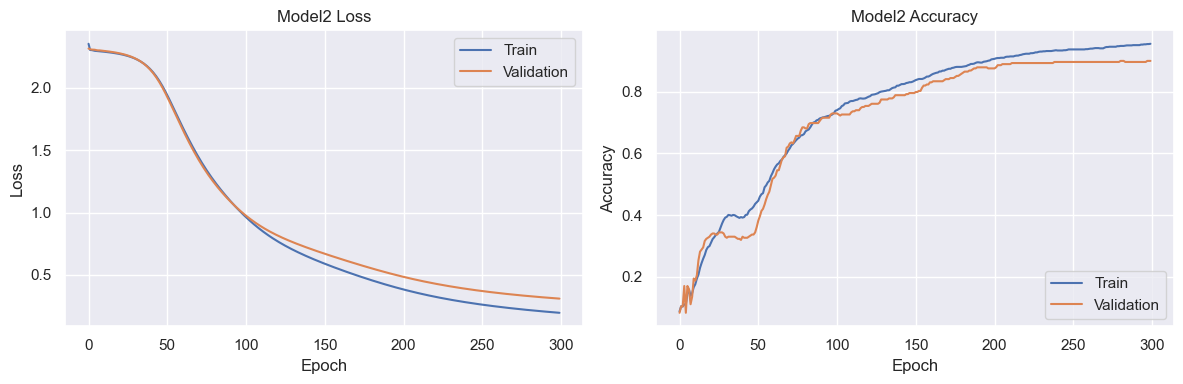

Training stopped at epoch 300


In [285]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history2.history['loss'])}")

In [287]:
# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath2)

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

12/12 - 0s - 16ms/step - accuracy: 0.9194 - loss: 0.2765
Test accuracy: 0.9194


The sigmoid activation functions seems to run into issues with its gradient in the initial stages of training. I had to increase the patience to 50 and evaluate the model on validation accuracy rather than loss in order to allow training to complete. Performance also takes longer to converge, I had to increase the epochs to 300 before I saw a plateau. Results are solid, but ReLU activation functions for the hidden layers have better performance.